<a href="https://colab.research.google.com/github/dongnt-1904/UEH-KTLT-ECO25/blob/buoi5_160925/ex1_FeatureEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Hướng dẫn 7a: Xây dựng đặc trưng (Feature Construction)

**Feature Construction** là quá trình **tạo ra các đặc trưng mới** từ những đặc trưng hiện có trong tập dữ liệu,  
nhằm giúp mô hình học máy **hiểu rõ hơn về cấu trúc dữ liệu** và **cải thiện hiệu suất dự đoán**.

Quá trình này thường bao gồm:
- **Kết hợp (combining)** các đặc trưng hiện có để tạo ra đặc trưng mới  
- **Biến đổi (transforming)** đặc trưng (ví dụ: log, căn bậc hai, chuẩn hóa, chuẩn hóa min-max)  
- **Rút trích thông tin (extracting information)** từ đặc trưng dạng ngày tháng, chuỗi ký tự, hoặc danh mục  
- **Mã hóa (encoding)** đặc trưng dạng phân loại (categorical features) thành dạng số  

Mục tiêu cuối cùng là **tăng khả năng mô hình hóa mối quan hệ tiềm ẩn** trong dữ liệu, giúp các thuật toán học máy hoạt động hiệu quả hơn.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load the dataset

In [ ]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Seperate the target variable
X=df[df.columns[1:-1]]   # read "-1" as "the last one"
y=df[df.columns[-1]]

In [ ]:
# Show the number of instances per class
y.value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


In [ ]:
# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

**Mục đích:**  
Đoạn code này dùng để **chia dữ liệu** thành hai phần: **tập huấn luyện (training set)** và **tập kiểm tra (testing set)** nhằm phục vụ cho quá trình xây dựng và đánh giá mô hình học máy.

**Cụ thể:**  
- `train_test_split()` là hàm trong thư viện `sklearn.model_selection` giúp tách dữ liệu.  
- `X` là tập các biến độc lập (đặc trưng đầu vào), còn `y` là biến mục tiêu (nhãn).  
- `test_size=0.3`: 30% dữ liệu được dùng để kiểm tra, 70% còn lại dùng để huấn luyện mô hình.  
- `random_state=42`: đảm bảo việc chia dữ liệu diễn ra **ngẫu nhiên nhưng tái lập được** (giúp kết quả ổn định khi chạy lại).  
- `stratify=y`: chia dữ liệu **theo tỉ lệ của các lớp trong biến mục tiêu**, tránh mất cân bằng lớp giữa tập train và test.  

**Kết quả:**  
Sau khi chạy, ta thu được 4 biến:  
- `X_train`, `y_train`: dữ liệu huấn luyện mô hình.  
- `X_test`, `y_test`: dữ liệu kiểm tra độ chính xác của mô hình.  

In [ ]:
#Check before standardization
X_train.head()

,sepal_width,petal_length,petal_width
98,2.5,3.0,1.1
68,2.2,4.5,1.5
19,3.8,1.5,0.3
143,3.2,5.9,2.3
99,2.8,4.1,1.3


## **PCA**

## Chuẩn hóa dữ liệu (Standardize the Data)

**PCA** (Phân tích thành phần chính – Principal Component Analysis) **bị ảnh hưởng bởi thang đo của dữ liệu**,  
vì vậy, trước khi áp dụng PCA, ta cần **đưa tất cả các đặc trưng về cùng một thang đo**,  
cụ thể là **có giá trị trung bình (mean) = 0** và **phương sai (variance) = 1**.

Chúng ta sẽ sử dụng **`StandardScaler`** để chuẩn hóa (standardize) các đặc trưng trong tập dữ liệu.

In [ ]:
#Now lets apply 1-1 "StandardScaler" transformer
#1) import the module
from sklearn.preprocessing import StandardScaler

#2) define the model
scaler=StandardScaler()

#3) fit the model
scaler.fit(X_train)

#4) transform the data
X_train_ss = scaler.transform(X_train)

# note 3 and 4 could be combined like this:
# X_train_ss = SS.fit_transform(X_train)

### Run PCA

In [ ]:
#Now lets perfrom pca
#Steps are similar to the scale transformer
#1) import the module
from sklearn.decomposition import PCA
#2) define the model
pca = PCA(n_components=2)   # n_components means the pca transformation constructs this many features
#3) fit the model
pca.fit(X_train_ss)
#4) transform the data
pca_train = pca.transform(X_train_ss)
# 3 and 4 could be combined
# pca_train = pca.fit_transform(X_train_ss)
# print the output, which is a matrix of only two features
pca_train[:10,:]
# ALT: plt.scatter(pca_train[:,0],pca_train[:,1])

array([[ 0.09953905, -1.27195338],
       [ 1.24517682, -1.511778  ],
       [-2.23995982,  0.82850939],
       [ 1.56980436,  1.02026044],
       [ 0.41457825, -0.43457392],
       [ 1.48337778,  0.51976305],
       [-1.80491446, -0.66531921],
       [-2.2865126 ,  0.80241998],
       [-1.58636569, -1.04325442],
       [ 1.57485976,  0.53649337]])

### Visualising the results

possible if it's 2d

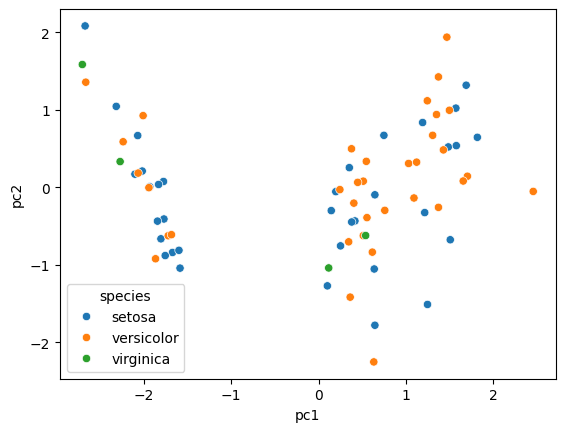

In [ ]:
#format and visualise the transformed training data
df_pca_train = pd.DataFrame(data = pca_train, columns = ['pc1', 'pc2'])
df_pca_train['species']=y_train
sns.scatterplot(x='pc1', y='pc2', hue=df_pca_train['species'], data=df_pca_train);

## Biến đổi dữ liệu kiểm tra (Transform the Test Data)

**Lưu ý:** Ở bước này, chúng ta **chỉ áp dụng các bộ biến đổi (transformers) đã được huấn luyện** từ dữ liệu huấn luyện để **biến đổi tập dữ liệu kiểm tra**.  
Tuyệt đối **không sử dụng phương thức `fit`** trên tập kiểm tra,  
vì việc đó sẽ khiến mô hình **học thêm thông tin mới từ dữ liệu kiểm tra**,  
dẫn đến **rò rỉ dữ liệu (data leakage)** và **kết quả đánh giá không chính xác**.

In [ ]:
#1- First apply the scaler that has been built based on the training data to scale the test data
X_test_ss = scaler.transform(X_test)
#2- Second apply the pca transformation that has been built based on the training data to transfer the scaled test data
pca_test = pca.transform(X_test_ss)

###Classification

In [ ]:
# Performing classification based on the orignal data
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=0)
#classifier=SVC()
classifier.fit(X_train, y_train)
score = accuracy_score(classifier.predict(X_test), y_test)
print('Accuracy before transformation  = {:.2f}'.format(score))

Accuracy before transformation  = 0.91


In [ ]:
# Performing classification using the pca-based transformed data
classifier.fit(pca_train, y_train)
score = accuracy_score(classifier.predict(pca_test), y_test)
print('Accuracy after PCA transformation  = {:.2f}'.format(score))

Accuracy after PCA transformation  = 0.93


##ICA

## Các bước thực hiện

Các bước trong phần này **rất giống** với quy trình của **StandardScaler** và **PCA transformers**.

Thực tế, có **nhiều phương pháp ICA (Independent Component Analysis)** khác nhau,  
nhưng trong hướng dẫn này, chúng ta sẽ sử dụng **thuật toán Fast ICA** được cung cấp trong thư viện **`sklearn`**.

In [ ]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=2)
ica_train = ica.fit_transform(X_train_ss)  # nb. we already did the scaling, above

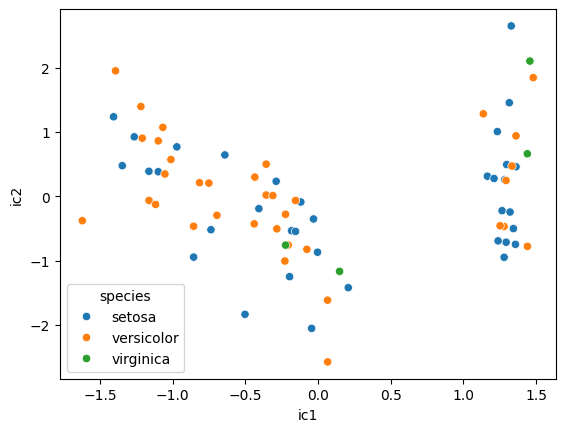

In [ ]:
# Visualisation
df_ica_train = pd.DataFrame(data = ica_train, columns = ['ic1', 'ic2'])
df_ica_train['species']=y_train
sns.scatterplot(x='ic1', y='ic2', hue=df_ica_train['species'], data=df_ica_train);

Đoạn code này trực quan hóa dữ liệu sau khi giảm chiều bằng **Independent Component Analysis (ICA)**.  
DataFrame `df_ica_train` được tạo với hai thành phần độc lập `ic1` và `ic2`, cùng nhãn `species` từ tập huấn luyện.  
Lệnh `sns.scatterplot(...)` vẽ biểu đồ phân tán thể hiện cách các mẫu dữ liệu được phân tách theo từng loài hoa.  
Nếu các cụm điểm có xu hướng tách biệt nhau, điều đó cho thấy ICA đã giúp biểu diễn dữ liệu tốt hơn cho việc phân loại.

In [ ]:
# Performing classification using the ica-based transformed data
# Transform test data using ica
classifier.fit(ica_train, y_train)
ica_test = ica.transform(X_test_ss)
score = accuracy_score(classifier.predict(ica_test), y_test)
print('Accuracy after ICA transformation  = {:.2f}'.format(score))

Accuracy after ICA transformation  = 0.93


Đoạn code này thực hiện **phân loại** dựa trên dữ liệu đã được **chuyển đổi bằng Independent Component Analysis (ICA)**.  
Cụ thể:  
- Mô hình `classifier` được huấn luyện trên dữ liệu huấn luyện đã qua ICA (`ica_train`, `y_train`).  
- Tập kiểm tra `X_test_ss` cũng được biến đổi bằng cùng mô hình ICA để tạo `ica_test`.  
- Sau đó, mô hình dự đoán nhãn cho `ica_test` và tính **độ chính xác (accuracy)** bằng `accuracy_score`.  

Kết quả in ra cho biết **mức độ chính xác của mô hình sau khi áp dụng ICA**, giúp đánh giá hiệu quả của kỹ thuật giảm chiều đối với hiệu suất phân loại.

## GP transformers

In [ ]:
# Might need to install the package for genetic programming (gp)
!pip install gplearn

In [ ]:
#Since this package does not work when the target variable is string, an encoder is used to convert it
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_encoded = le.fit_transform(y_train)
label_encoded

array([1, 1, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 2, 1, 0, 2,
       2, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 2, 0, 2, 0,
       2, 1, 0, 2, 1, 2, 1, 0, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2,
       2, 0, 2, 1, 1, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 0, 0, 1, 0, 1, 0])

---
